In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

Matplotlib is building the font cache; this may take a moment.


In [14]:
dtrain = pd.read_csv('C:/Users/Harish/Downloads/train.csv/train.csv')
dtest = pd.read_csv('C:/Users/Harish/Downloads/test.csv/test.csv')

In [15]:
training_labels = dtrain['label'].values
training_data = dtrain.values[:, 1:]

In [16]:
len(training_labels)

42000

In [17]:
trainScaled = training_data / 255
testScaled = dtest.values / 255

In [18]:
isize = 28

trainImages = trainScaled.reshape(dtrain.shape[0], isize, isize, 1)
testImages = testScaled.reshape(dtest.shape[0], isize, isize, 1)

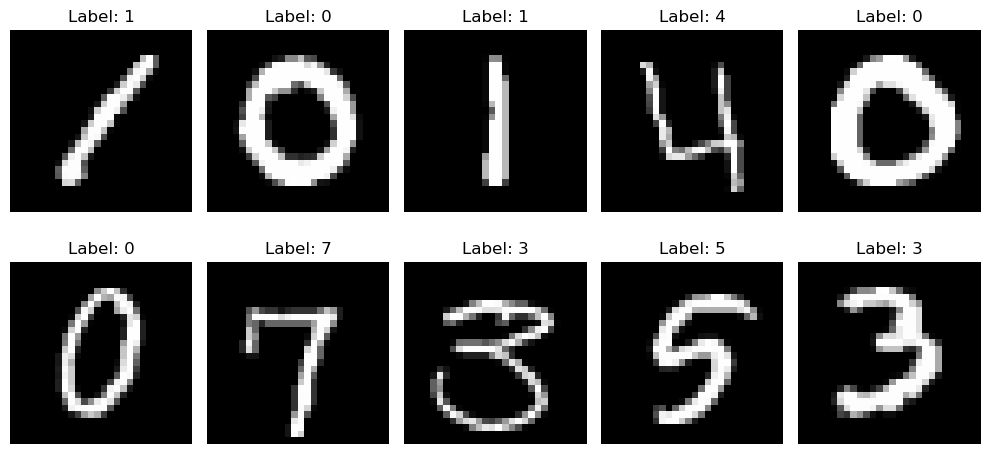

In [19]:
plt.figure(figsize=(10, 5))

for i in range(10): 
    plt.subplot(2, 5, i + 1)
    plt.imshow(trainImages[i], cmap='gray')
    plt.title(f"Label: {training_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [27]:
X_train, X_val, y_train, y_val = train_test_split(trainImages, training_labels, test_size=0.2, random_state=42)

In [28]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),
])

In [24]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 16)        0         
                                                                 
 batch_normalization_3 (Bat  (None, 13, 13, 16)        64        
 chNormalization)                                                
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 32)         

In [29]:
es = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True)

In [30]:
def learning_rate_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
lr_scheduler = LearningRateScheduler(learning_rate_scheduler)

In [31]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
)
datagen.fit(X_train)
adg = datagen.flow(X_train, y_train, batch_size=64)

In [36]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 16)        0         
                                                                 
 batch_normalization_6 (Bat  (None, 13, 13, 16)        64        
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 32)         

In [37]:
history = model.fit(
    adg,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=16,
    callbacks=[es, lr_scheduler]
)

Epoch 1/20
525/525 [==============================] - 48s 73ms/step - loss: 1.4994 - accuracy: 0.4776 - val_loss: 1.0171 - val_accuracy: 0.6707 - lr: 0.0010
Epoch 2/20
525/525 [==============================] - 31s 60ms/step - loss: 0.7285 - accuracy: 0.7609 - val_loss: 0.1914 - val_accuracy: 0.9389 - lr: 0.0010
Epoch 3/20
525/525 [==============================] - 33s 63ms/step - loss: 0.5211 - accuracy: 0.8312 - val_loss: 0.1338 - val_accuracy: 0.9590 - lr: 0.0010
Epoch 4/20
525/525 [==============================] - 31s 60ms/step - loss: 0.4328 - accuracy: 0.8596 - val_loss: 0.1275 - val_accuracy: 0.9625 - lr: 0.0010
Epoch 5/20
525/525 [==============================] - 31s 59ms/step - loss: 0.3908 - accuracy: 0.8753 - val_loss: 0.1034 - val_accuracy: 0.9705 - lr: 0.0010
Epoch 6/20
525/525 [==============================] - 33s 62ms/step - loss: 0.3540 - accuracy: 0.8865 - val_loss: 0.0881 - val_accuracy: 0.9725 - lr: 0.0010
Epoch 7/20
525/525 [==============================] - 30s 

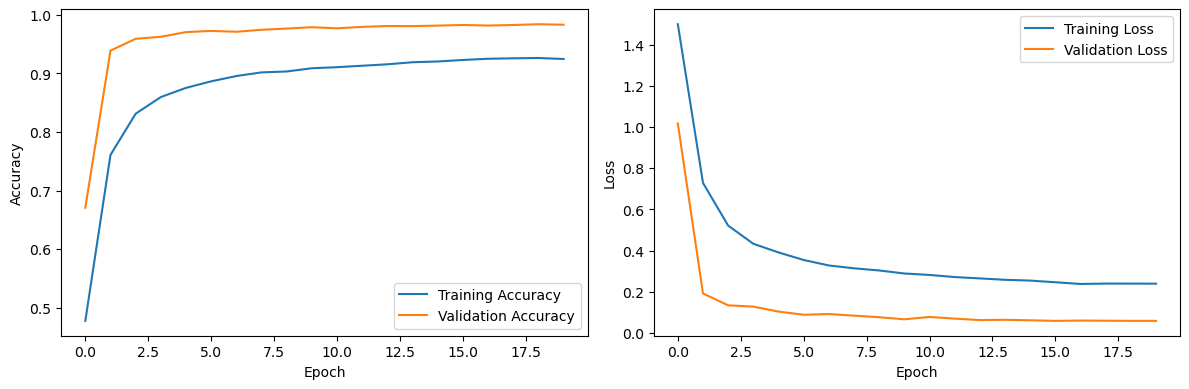

In [38]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [39]:
predictions = pd.DataFrame({
    'ImageId': np.arange(1, len(testImages) + 1),
    'Label': np.argmax(
        model.predict(testImages),
        axis=1
    )}
).set_index('ImageId')
predictions

875/875 [==============================] - 9s 8ms/step


,Label
ImageId,
1,2
2,0
3,9
4,9
5,3
...,...
27996,9
27997,7
27998,3


In [41]:
vloss, vaccuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {vloss}, Validation Accuracy: {vaccuracy}")

263/263 [==============================] - 3s 9ms/step - loss: 0.0582 - accuracy: 0.9831
Validation Loss: 0.05818523094058037, Validation Accuracy: 0.9830952286720276


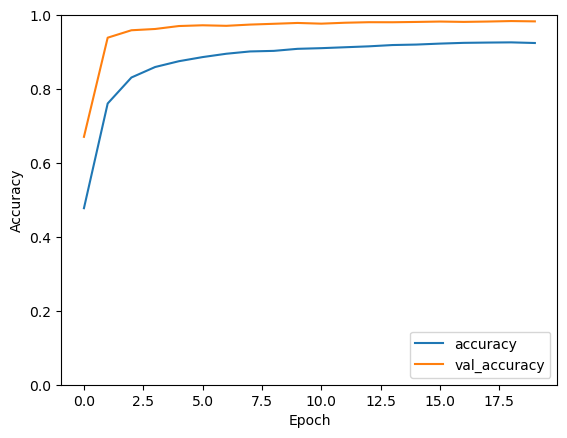

In [42]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [58]:
pred = model.predict(testImages)
predlabels = np.argmax(pred, axis=1)

875/875 [==============================] - 6s 7ms/step


In [60]:
submission = pd.DataFrame({'ImageId': np.arange(1, len(predlabels) + 1), 'Label': predlabels})

submission.to_csv("C:/Users/sound/Downloads/sample_submission.csv", index=False)

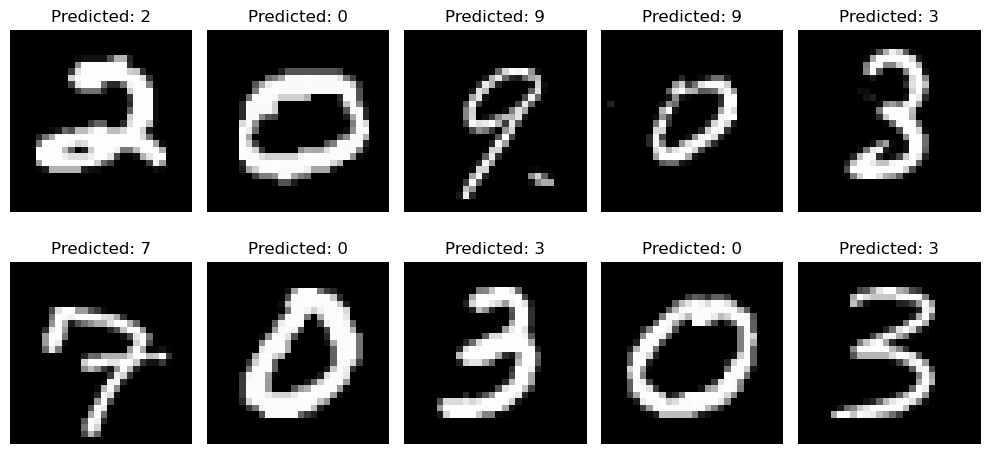

In [61]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predlabels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()